In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [2]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [77]:
import_data = nfl.import_weekly_data([2022])             
wr_data = pd.DataFrame(index = import_data.index)
wr_data["Player"] = import_data["player_name"]
wr_data["Team"] = import_data["recent_team"]
wr_data["Position"] = import_data["position"]
wr_data["Week"] = import_data["week"]
wr_data["Receptions"] = import_data["receptions"]
wr_data["Targets"] = import_data["targets"]
wr_data["Receiving Yards"] = import_data["receiving_yards"]
wr_data["Receiving TDs"] = import_data["receiving_tds"]
wr_data["Fumbles"] = import_data["receiving_fumbles"]
wr_data["Fumbles Lost"] = import_data["receiving_fumbles_lost"]
wr_data["Air Yards"] = import_data["receiving_air_yards"]
wr_data["YAC"] = import_data["receiving_yards_after_catch"]
wr_data["Receiving 1st Downs"] = import_data["receiving_first_downs"]
wr_data["Receiving EPA"] = import_data["receiving_epa"]
wr_data["Receiving 2pt Conversions"] = import_data["receiving_2pt_conversions"]
wr_data["RACR"] = import_data["racr"]
wr_data["Target Share"] = import_data["target_share"]
wr_data["Air Yards Share"] = import_data["air_yards_share"]
wr_data["Player Full Name"] = import_data["player_display_name"]
wr_data = wr_data.loc[(wr_data["Targets"] > 0) & (wr_data["Week"] == 1), :]
wr_data = wr_data.sort_values(by=['Team'])
wr_data.loc[wr_data["Team"] == "LA", "Team"] = "LAR"
wr_data

Downcasting floats.


,Player,Team,Position,Week,Receptions,Targets,Receiving Yards,Receiving TDs,Fumbles,Fumbles Lost,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Player Full Name
5,A.Green,ARI,WR,1,2,4,13.0,0,0.0,0.0,42.0,0.0,1.0,-2.831257,0,0.309524,0.111111,0.157895,A.J. Green
213,M.Brown,ARI,WR,1,4,6,43.0,1,0.0,0.0,101.0,3.0,2.0,4.507902,0,0.425743,0.166667,0.379699,Marquise Brown
259,E.Benjamin,ARI,RB,1,3,4,33.0,0,0.0,0.0,2.0,35.0,1.0,0.949588,0,16.500000,0.111111,0.007519,Eno Benjamin
201,A.Isabella,ARI,WR,1,1,3,10.0,0,0.0,0.0,30.0,4.0,1.0,-0.254880,0,0.333333,0.083333,0.112782,Andy Isabella
200,G.Dortch,ARI,WR,1,7,9,63.0,0,0.0,0.0,62.0,31.0,3.0,3.317631,0,1.016129,0.250000,0.233083,Greg Dortch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,J.Dotson,WAS,WR,1,3,5,40.0,2,0.0,0.0,68.0,1.0,2.0,1.959652,0,0.588235,0.121951,0.234483,Jahan Dotson
88,C.Samuel,WAS,WR,1,8,11,55.0,1,0.0,0.0,11.0,48.0,5.0,2.988909,0,5.000000,0.268293,0.037931,Curtis Samuel
212,T.McLaurin,WAS,WR,1,2,4,58.0,1,0.0,0.0,75.0,20.0,2.0,5.068677,0,0.773333,0.097561,0.258621,Terry McLaurin
67,J.McKissic,WAS,RB,1,3,3,20.0,0,0.0,0.0,1.0,19.0,1.0,-0.158128,1,20.000000,0.073171,0.003448,J.D. McKissic


In [78]:
wr_data_ngs = pd.read_csv("../Resources/ngs_2022_receiving.csv")
wr_data_ngs = wr_data_ngs.loc[wr_data_ngs["week"] == 1, :]
wr_data_ngs = wr_data_ngs.sort_values(by=['team_abbr'])
wr_data_ngs = wr_data_ngs.drop_duplicates(subset=['player_display_name'])
wr_data_full = wr_data_ngs.merge(wr_data, left_on='player_display_name', right_on='Player Full Name')
wr_data_full = wr_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name", "player_jersey_number"])
wr_data_full.columns

Index(['week', 'player_display_name', 'player_position', 'team_abbr',
       'avg_cushion', 'avg_separation', 'avg_intended_air_yards',
       'percent_share_of_intended_air_yards', 'receptions', 'targets',
       'catch_percentage', 'yards', 'rec_touchdowns', 'avg_yac',
       'avg_expected_yac', 'avg_yac_above_expectation', 'player_gsis_id',
       'player_short_name', 'Player', 'Team', 'Position', 'Week', 'Receptions',
       'Targets', 'Receiving Yards', 'Receiving TDs', 'Fumbles',
       'Fumbles Lost', 'Air Yards', 'YAC', 'Receiving 1st Downs',
       'Receiving EPA', 'Receiving 2pt Conversions', 'RACR', 'Target Share',
       'Air Yards Share', 'Player Full Name'],
      dtype='object')

In [79]:
wr_data_full = wr_data_full.reset_index()
wr_data_full = wr_data_full.drop(columns = ["index"])
#rb_data_full = rb_data_full.drop(columns = ["level_0"])
wr_data_full

,week,player_display_name,player_position,team_abbr,avg_cushion,avg_separation,avg_intended_air_yards,percent_share_of_intended_air_yards,receptions,targets,...,Fumbles Lost,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Player Full Name
0,1,Marquise Brown,WR,ARI,4.930000,2.236446,17.900000,41.809405,4,6,...,0.0,101.0,3.0,2.0,4.507902,0,0.425743,0.166667,0.379699,Marquise Brown
1,1,Greg Dortch,WR,ARI,5.970000,3.804700,6.330000,22.177671,7,9,...,0.0,62.0,31.0,3.0,3.317631,0,1.016129,0.250000,0.233083,Greg Dortch
2,1,Kyle Pitts,TE,ATL,4.236667,2.262791,12.157143,30.610410,2,7,...,0.0,93.0,6.0,1.0,-1.582489,0,0.204301,0.218750,0.329787,Kyle Pitts
3,1,Drake London,WR,ATL,6.462857,2.532407,12.497143,31.466494,5,7,...,0.0,88.0,18.0,3.0,4.130487,0,0.840909,0.218750,0.312057,Drake London
4,1,Rashod Bateman,WR,BAL,6.786000,4.033111,20.770000,29.339473,2,5,...,0.0,108.0,12.0,1.0,1.044245,0,0.546296,0.172414,0.306818,Rashod Bateman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1,Treylon Burks,WR,TEN,7.147500,4.946421,19.378000,33.695010,3,5,...,0.0,99.0,30.0,2.0,2.070118,0,0.555556,0.161290,0.341379,Treylon Burks
68,1,Kyle Philips,WR,TEN,7.046667,2.446139,8.080000,25.289515,6,9,...,0.0,75.0,10.0,3.0,1.039075,0,0.880000,0.290323,0.258621,Kyle Philips
69,1,Curtis Samuel,WR,WAS,7.566000,3.475712,1.550000,5.502307,8,11,...,0.0,11.0,48.0,5.0,2.988909,0,5.000000,0.268293,0.037931,Curtis Samuel
70,1,Jahan Dotson,WR,WAS,8.128000,2.776658,15.702000,25.336431,3,5,...,0.0,68.0,1.0,2.0,1.959652,0,0.588235,0.121951,0.234483,Jahan Dotson


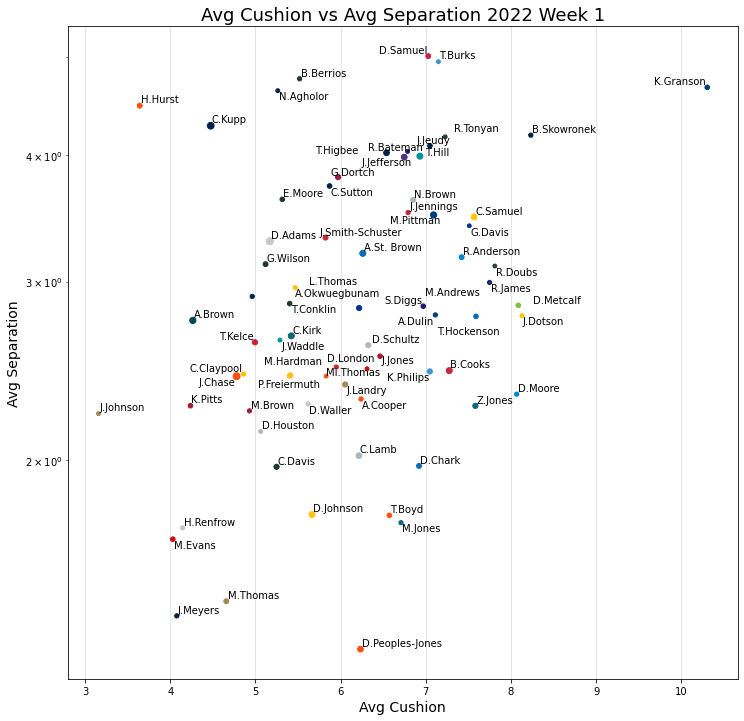

In [80]:
wr_graph = wr_data_full[["player_short_name", "avg_cushion", "avg_separation", "team_abbr",
                         "targets"]]

x = wr_graph["avg_cushion"]
y = wr_graph["avg_separation"]
color = []

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Cushion', fontsize=14)
plt.ylabel('Avg Separation', fontsize=14)
plt.yscale('log')
plt.title('Avg Cushion vs Avg Separation 2022 Week 1', fontsize=18)

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

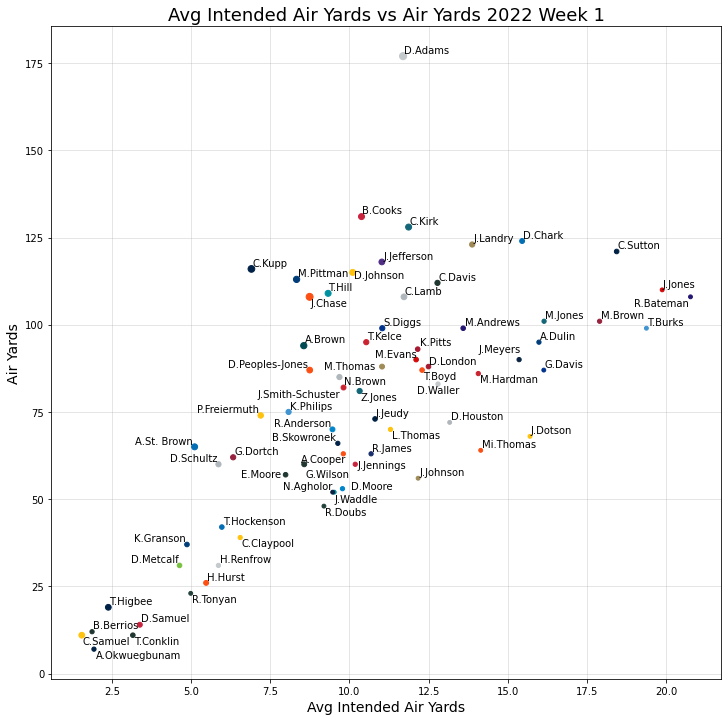

In [81]:
wr_graph = wr_data_full[["player_short_name", "avg_intended_air_yards", "Air Yards", "team_abbr",
                         "targets"]]

x = wr_graph["avg_intended_air_yards"]
y = wr_graph["Air Yards"]
color = []

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Intended Air Yards', fontsize=14)
plt.ylabel('Air Yards', fontsize=14)
#plt.yscale('log')
plt.title('Avg Intended Air Yards vs Air Yards 2022 Week 1', fontsize=18)

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

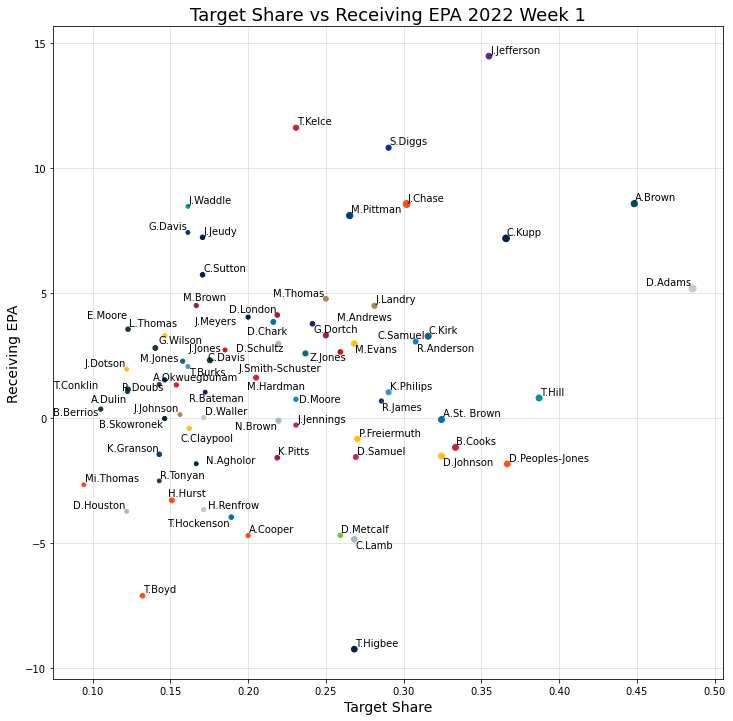

In [82]:
wr_graph = wr_data_full[["player_short_name", "Target Share", "Receiving EPA", "team_abbr",
                         "targets"]]

x = wr_graph["Target Share"]
y = wr_graph["Receiving EPA"]
color = []

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Target Share', fontsize=14)
plt.ylabel('Receiving EPA', fontsize=14)
#plt.yscale('log')
plt.title('Target Share vs Receiving EPA 2022 Week 1', fontsize=18)

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

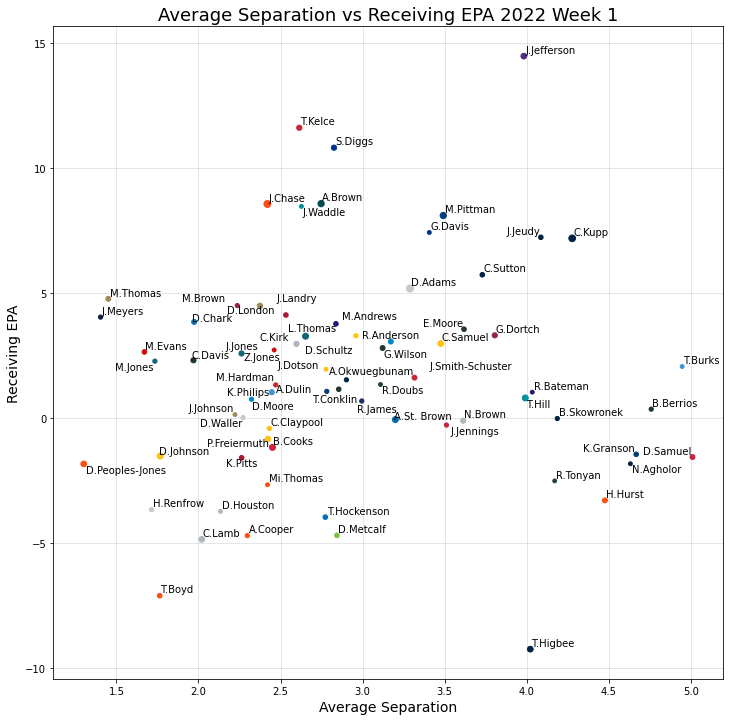

In [83]:
wr_graph = wr_data_full[["player_short_name", "avg_separation", "Receiving EPA", "team_abbr",
                         "targets"]]

x = wr_graph["avg_separation"]
y = wr_graph["Receiving EPA"]
color = []

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Separation', fontsize=14)
plt.ylabel('Receiving EPA', fontsize=14)
#plt.yscale('log')
plt.title('Average Separation vs Receiving EPA 2022 Week 1', fontsize=18)

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()